# Transfer Learning - Cats vs Dogs

**Participante:** Natália Ferreira  
**Curso:** BairesDev - Machine Learning Training

Este notebook é parte de um desafio de projeto proposto no módulo Programação para Machine Learning, com foco em **Redes Neurais e Transfer Learning**.

O objetivo é aplicar um modelo pré-treinado (MobileNetV2) para classificar imagens em duas categorias: **gatos** e **cachorros**, utilizando o dataset `cats_vs_dogs`, fornecido pelo TensorFlow Datasets.

A proposta demonstra como é possível utilizar modelos já treinados para resolver problemas específicos com menos dados e menor custo computacional, através da técnica de **Transfer Learning** (aprendizado por transferência).

In [2]:
# Instalação e importação de bibliotecas
import tensorflow as tf
import tensorflow_datasets as tfds
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report


In [4]:
# Carregar o dataset cats_vs_dogs
(ds_train, ds_val), ds_info = tfds.load(
    'cats_vs_dogs',
    split=['train[:80%]', 'train[80%:]'],
    as_supervised=True,
    with_info=True
)

class_names = ds_info.features['label'].names
print("Classes:", class_names)


Classes: ['cat', 'dog']


In [5]:
# Pré-processamento: redimensionar imagens e normalizar
IMG_SIZE = (160, 160)

def format_image(image, label):
    image = tf.image.resize(image, IMG_SIZE)
    image = tf.cast(image, tf.float32) / 255.0
    return image, label

BATCH_SIZE = 32
AUTOTUNE = tf.data.AUTOTUNE

train_batches = ds_train.map(format_image).batch(BATCH_SIZE).prefetch(AUTOTUNE)
val_batches = ds_val.map(format_image).batch(BATCH_SIZE).prefetch(AUTOTUNE)


In [6]:
# Carregar o modelo pré-treinado MobileNetV2
base_model = tf.keras.applications.MobileNetV2(input_shape=(160, 160, 3),
                                               include_top=False,
                                               weights='imagenet')
base_model.trainable = False  # Congela as camadas

# Adicionando camadas customizadas
model = tf.keras.Sequential([
    base_model,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(1, activation='sigmoid')  # Classificação binária
])


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [8]:
# Compilar e treinar o modelo
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_batches,
                    validation_data=val_batches,
                    epochs=5)


Epoch 1/5
582/582 ━━━━━━━━━━━━━━━━━━━━ 545s 926ms/step - accuracy: 0.9800 - loss: 0.0583 - val_accuracy: 0.9791 - val_loss: 0.0584
Epoch 2/5
582/582 ━━━━━━━━━━━━━━━━━━━━ 521s 895ms/step - accuracy: 0.9826 - loss: 0.0502 - val_accuracy: 0.9798 - val_loss: 0.0581
Epoch 3/5
582/582 ━━━━━━━━━━━━━━━━━━━━ 521s 895ms/step - accuracy: 0.9845 - loss: 0.0463 - val_accuracy: 0.9791 - val_loss: 0.0584
Epoch 4/5
582/582 ━━━━━━━━━━━━━━━━━━━━ 528s 906ms/step - accuracy: 0.9854 - loss: 0.0433 - val_accuracy: 0.9791 - val_loss: 0.0589
Epoch 5/5
582/582 ━━━━━━━━━━━━━━━━━━━━ 518s 890ms/step - accuracy: 0.9866 - loss: 0.0408 - val_accuracy: 0.9787 - val_loss: 0.0596


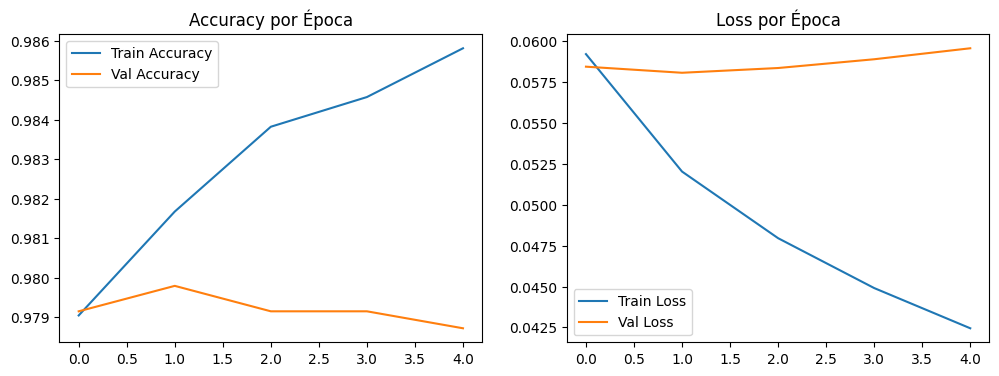

In [9]:
# Plotar desempenho do modelo
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(5)

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Train Accuracy')
plt.plot(epochs_range, val_acc, label='Val Accuracy')
plt.legend()
plt.title('Accuracy por Época')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Train Loss')
plt.plot(epochs_range, val_loss, label='Val Loss')
plt.legend()
plt.title('Loss por Época')
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 595ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 949ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 569ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 593ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 587ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 569ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 594ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 578ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 562ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 592ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 573ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 610ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 591ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 576ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 601ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 586ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 858ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step   
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 845ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 597ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 571ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 565ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 585ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 578

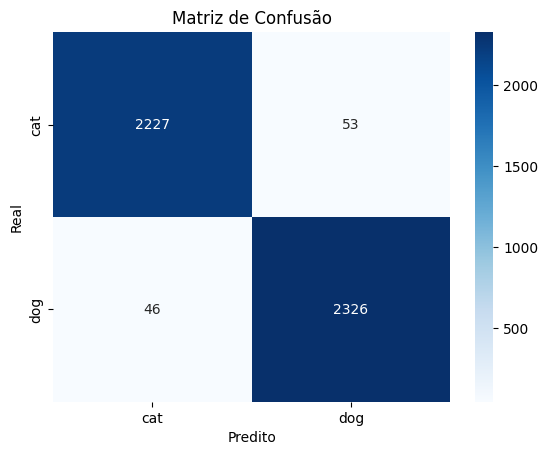

              precision    recall  f1-score   support

         cat       0.98      0.98      0.98      2280
         dog       0.98      0.98      0.98      2372

    accuracy                           0.98      4652
   macro avg       0.98      0.98      0.98      4652
weighted avg       0.98      0.98      0.98      4652



In [10]:
# Avaliar e gerar matriz de confusão
y_true = []
y_pred = []

for images, labels in val_batches:
    preds = model.predict(images)
    y_true.extend(labels.numpy())
    y_pred.extend((preds > 0.5).astype(int).flatten())

cm = confusion_matrix(y_true, y_pred)
sns.heatmap(cm, annot=True, fmt='d', xticklabels=class_names, yticklabels=class_names, cmap="Blues")
plt.xlabel('Predito')
plt.ylabel('Real')
plt.title('Matriz de Confusão')
plt.show()

print(classification_report(y_true, y_pred, target_names=class_names))


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 932ms/step


/tmp/ipython-input-11-2613036440.py:10: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  pred_label = class_names[int(preds[i] > 0.5)]


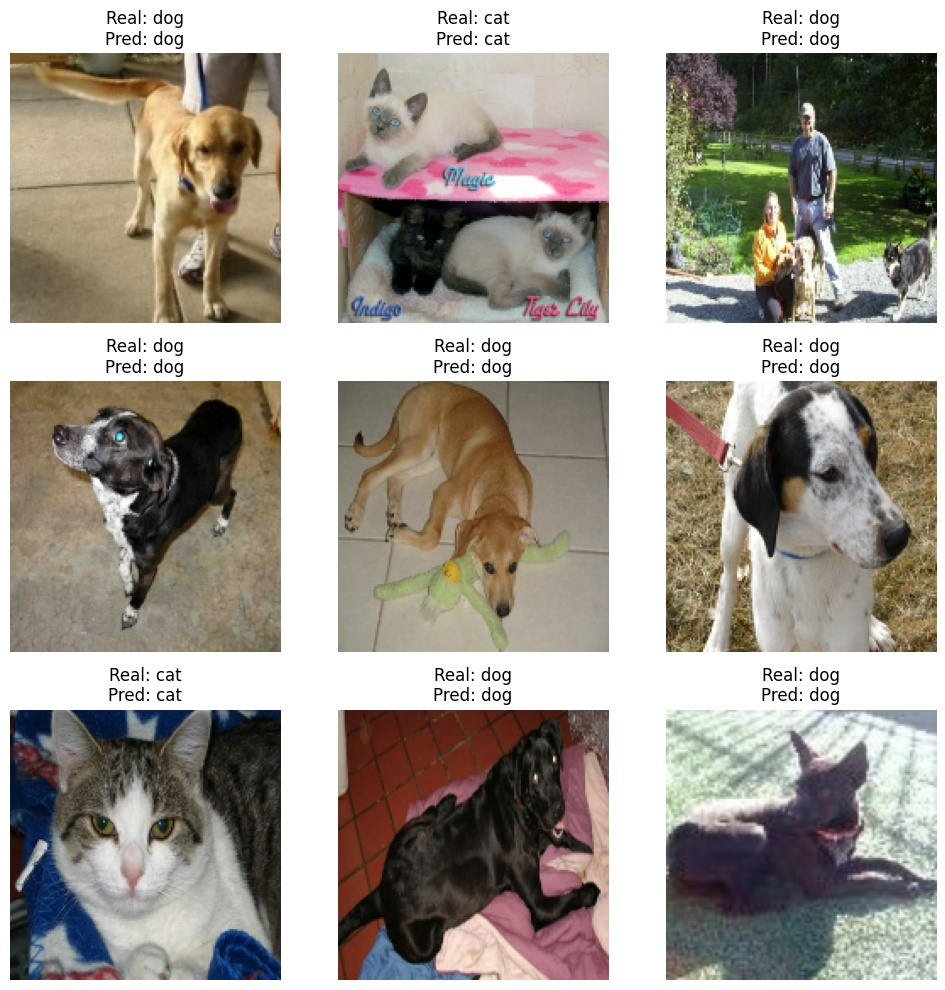

In [11]:
# Exibir previsões com imagens reais
import random

for images, labels in val_batches.take(1):
    preds = model.predict(images)
    plt.figure(figsize=(10, 10))
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])
        pred_label = class_names[int(preds[i] > 0.5)]
        true_label = class_names[labels[i]]
        plt.title(f"Real: {true_label}\nPred: {pred_label}")
        plt.axis("off")
    plt.tight_layout()
    plt.show()
